In [1]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# To Load the dataset
filename = "./Wine Quality/wine.csv"
df = pd.read_csv(filename, index_col='index')
df = df.sample(frac=1).reset_index(drop=True) # Shuffle dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.9,0.27,0.32,2.0,0.034,31.0,102.0,0.98952,3.16,0.56,12.3,6
1,8.2,0.23,0.40,1.2,0.027,36.0,121.0,0.99200,3.12,0.38,10.7,6
2,7.1,0.46,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,5
3,7.5,0.26,0.52,13.2,0.047,64.0,179.0,0.99820,3.10,0.46,9.0,5
4,6.0,0.38,0.26,6.0,0.034,42.0,134.0,0.99120,3.38,0.38,12.3,7


In [3]:
# To check the shape of dataset
print(df.shape)

(6497, 12)


In [4]:
# To check the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [5]:
# To see the statistics of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


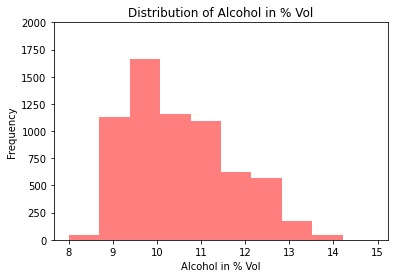

In [6]:
# Distribution of Alcohol
plt.hist(df.alcohol, 10, facecolor ='red',
              alpha = 0.5, label ="wine")
plt.ylim([0, 2000])
plt.xlabel("Alcohol in % Vol")
plt.ylabel("Frequency")
plt.title("Distribution of Alcohol in % Vol")
plt.show()

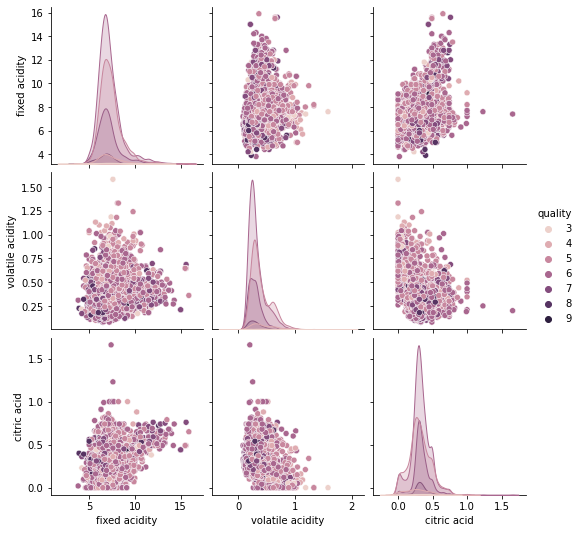

In [7]:
# To see the correlation between some features and quality
g = sns.pairplot(df, vars=["fixed acidity", "volatile acidity","citric acid"], hue="quality")
plt.show(g)

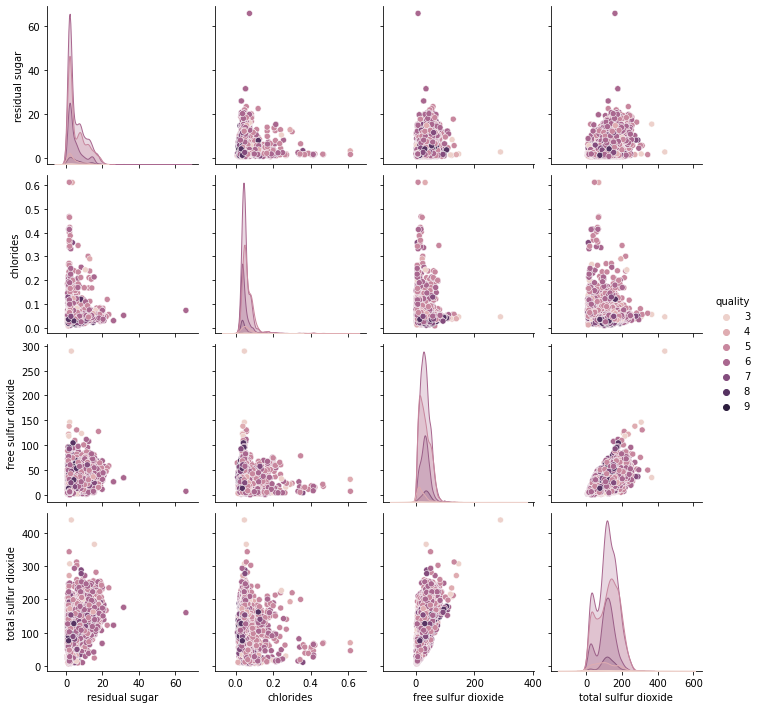

In [8]:
# To see the correlation between some features and quality
h = sns.pairplot(df, vars=["residual sugar", "chlorides","free sulfur dioxide","total sulfur dioxide"], hue="quality")
plt.show(h)

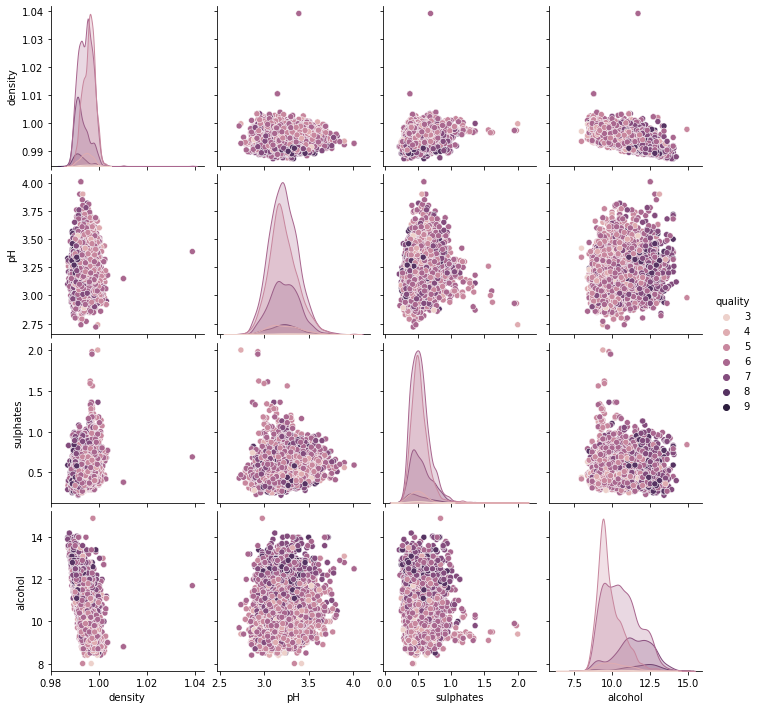

In [9]:
# To see the correlation between some features and quality
i = sns.pairplot(df, vars=["density","pH","sulphates","alcohol"], hue="quality")
plt.show(i)

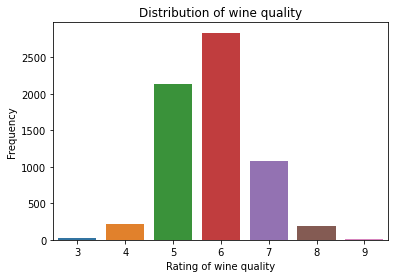

In [10]:
# To check the frequency of the quality
j = sns.countplot(x="quality", data=df)
plt.xlabel("Rating of wine quality")
plt.ylabel("Frequency")
plt.title("Distribution of wine quality")
plt.show(j)

In [11]:
# To convert binary classification of quality 
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [12]:
# To see the classification of quality
df.quality.value_counts()

1    4113
0    2384
Name: quality, dtype: int64

In [13]:
# Creating a test/train split

X = df.iloc[:, 0:11]
y= df.iloc[:, 11]

# Splitting the data set for training and validating 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [15]:
# Check the shape of the features and the target
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197,)
(1300,)


In [16]:
# Initialize the constructor
model = Sequential()
# Add an input layer
model.add(Dense(12, input_shape=(11,), kernel_initializer='normal', activation="relu"))
# Add one hidden layer
model.add(Dense(9, kernel_initializer='normal', activation="relu"))
# Add an output layer
model.add(Dense(1, kernel_initializer='normal', activation="sigmoid"))

In [17]:
# Model output shape
model.output_shape

(None, 1)

In [18]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 117       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [19]:
# List all weight tensors
model.get_weights()

# To compile the model
learning_rate = 0.001
model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=30, batch_size = 1, validation_split=0.1, verbose=1)

Epoch 1/30
4677/4677 [==============================] - 12s 2ms/step - loss: 0.1800 - accuracy: 0.7223 - val_loss: 0.1694 - val_accuracy: 0.7692
Epoch 2/30
4677/4677 [==============================] - 12s 3ms/step - loss: 0.1661 - accuracy: 0.7543 - val_loss: 0.1668 - val_accuracy: 0.7462
Epoch 3/30
4677/4677 [==============================] - 11s 2ms/step - loss: 0.1632 - accuracy: 0.7614 - val_loss: 0.1704 - val_accuracy: 0.7519
Epoch 4/30
4677/4677 [==============================] - 10s 2ms/step - loss: 0.1620 - accuracy: 0.7635 - val_loss: 0.1711 - val_accuracy: 0.7519
Epoch 5/30
4677/4677 [==============================] - 11s 2ms/step - loss: 0.1608 - accuracy: 0.7678 - val_loss: 0.1701 - val_accuracy: 0.7365
Epoch 6/30
4677/4677 [==============================] - 11s 2ms/step - loss: 0.1597 - accuracy: 0.7680 - val_loss: 0.1681 - val_accuracy: 0.7404
Epoch 7/30
4677/4677 [==============================] - 10s 2ms/step - loss: 0.1590 - accuracy: 0.7721 - val_loss: 0.1676 - val_ac

In [20]:
# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)

[[0.77239156]
 [0.90002847]
 [0.36106944]
 ...
 [0.3087317 ]
 [0.9314076 ]
 [0.6073017 ]]


In [21]:
# evaluate the train model
scores_train = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores_train[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

163/163 [==============================] - 1s 3ms/step - loss: 0.1488 - accuracy: 0.7874

loss: 14.88%

accuracy: 78.74%


In [22]:
# evaluate the test model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

41/41 [==============================] - 0s 4ms/step - loss: 0.1712 - accuracy: 0.7546

loss: 17.12%

accuracy: 75.46%


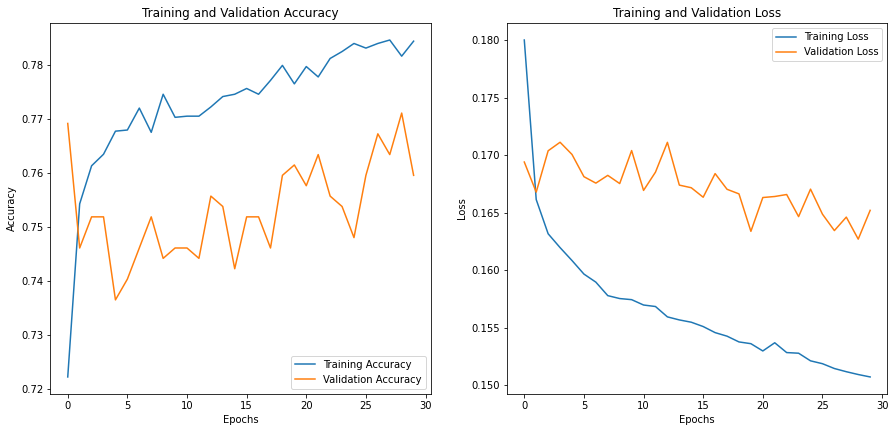

In [23]:
# To plot the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
# To change type of the y_pred 
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [25]:
# To see the classifiaction report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       490
           1       0.79      0.83      0.81       810

    accuracy                           0.75      1300
   macro avg       0.74      0.73      0.73      1300
weighted avg       0.75      0.75      0.75      1300



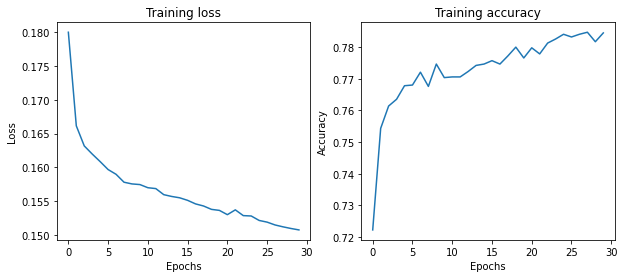

In [26]:
# To plot train accuracy and loss
loss = history.history['loss']
accuracy = history.history['accuracy']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

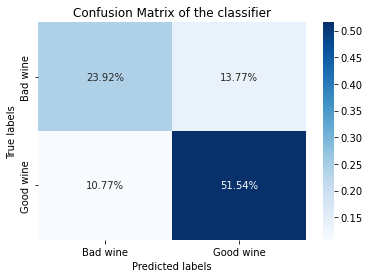

In [27]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax, cmap=plt.cm.Blues) # annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of the classifier')
ax.xaxis.set_ticklabels(['Bad wine', 'Good wine']); ax.yaxis.set_ticklabels(['Bad wine', 'Good wine']);
plt.show()